In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
data = pd.read_csv('data/SigSpatial_crime_data_full.csv', dtype={'Identifier':str})
data['income_group'] = pd.qcut(data['aver_income'], 4, labels=['q1','q2','q3','q4'])
z_pro = data['pro_cnt']
z_vio = data['vio_cnt']
pi = data['PI_type']
ic = data['income_group']
data_idx = data.index.tolist()
# idx_json = exp_pred.get_train_test_splits()

# violent crimes

## autocorr


In [35]:
# b1_prior=-2
tbl="""	a[1]	a[2]	a[3]	a[4]	a[5]	a[6]	a[7]	a[8]	a[9]	b[1]	b[2]	b[3]	b[4]	b[5]	b[6]	b[7]
0	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1
1	0.558455585	0.177575947	0.14465489	0.220985877	0.220109521	-0.00489879	0.170119909	-0.004152123	0.170474909	0.008672991	0.083197584	0.30524491	0.126308192	0.219540896	0.08223777	0.429978167
5	0.269607736	0.021225284	0.016680536	0.093706332	0.095684597	-0.006897205	0.020682958	-0.006642602	0.087571681	-0.015111672	0.018312745	0.082587246	0.036048168	0.034853945	-0.016157558	0.219236935
10	0.122440541	-0.013884884	-0.011193912	0.047427228	0.046948308	-0.005535935	-0.004189645	-0.005836698	0.04497573	-0.002602138	0.007600484	0.027948885	0.020055513	0.0105586	0.012101749	0.102154928
50	0.004449655	0.006325056	0.001157514	-0.008224368	-0.008000385	-0.01435972	-0.00116956	-0.014763352	0.00694224	0.004816845	-0.005964401	0.005574524	-0.009063263	0.002903895	-0.007548279	-0.010510213
"""
tbl = [l.split('\t') for l in tbl.split('\n')]

tbl =pd.DataFrame(tbl).drop(6).set_index(0)
new_header = tbl.iloc[0] #grab the first row for the header
new_header = [c[0].replace('a','$α_').replace('b','$𝛽_') + str(int(c[2:-1])-1)+'$' for c in new_header]
tbl = tbl[1:] #take the data less the header row
tbl.columns = new_header #set the header row as the df header
tbl = tbl.astype(float) 

Text(0.5, 0, 'Lag')

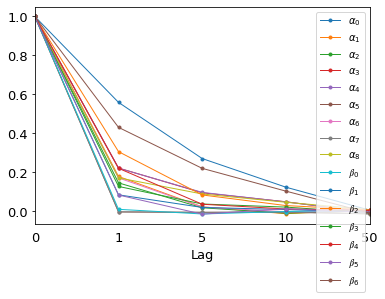

In [37]:
fig, ax = plt.subplots()
tbl.plot(linewidth=1,marker='.', ax=ax, figsize=(6,4), fontsize=13)
plt.tick_params(axis = "x", which = "major", bottom = False, top = False)
ax.set_xlabel('Lag', fontsize=13)
# plt.savefig('exp_result/SigSpatial/autocorrelation.pdf')

## coeff

In [39]:
# b1_prior=-2
tbl = """
          Mean       SD  Naive SE Time-series SE
a[1]   5.88690 0.025575 2.859e-04      8.136e-04
a[2]   0.07598 0.010809 1.209e-04      1.748e-04
a[3]   1.00561 0.010286 1.150e-04      1.645e-04
a[4]   1.04889 0.019446 2.174e-04      3.713e-04
a[5]  -1.83373 0.019593 2.191e-04      3.737e-04
a[6] -12.48906 0.388412 4.343e-03      4.294e-03
a[7]  -0.08950 0.007286 8.146e-05      1.150e-04
a[8]  13.55419 0.388349 4.342e-03      4.295e-03
a[9]  -1.58080 0.006460 7.222e-05      1.231e-04
b[1] -27.69009 0.191806 2.144e-03      2.214e-03
b[2]   2.08500 0.037027 4.140e-04      4.842e-04
b[3]   4.89593 0.030376 3.396e-04      6.146e-04
b[4]  -0.60517 0.043373 4.849e-04      5.827e-04
b[5]  -1.40181 0.008616 9.633e-05      1.385e-04
b[6]   0.46722 0.002231 2.494e-05      2.775e-05
b[7]  -0.28100 0.003434 3.839e-05      9.450e-05
"""

In [63]:
tmpdf = pd.DataFrame([line.split() for line in tbl.strip().split('\n')]).drop(0)[[0,1,2]]

tmpdf[0] = [c[0].replace('a','$\alpha_').replace('b','$\beta_') + str(int(c[2:-1])-1)+'$' for c in tmpdf[0]]
tmpdf= tmpdf.set_index(0)
tmpdf = tmpdf.applymap(lambda x: f'{float(x):.2f}')
tmpdf[3] = ['intercept', 'log(NHS)', 'log(AHS)', 'log(COMP)', 'log(MCOMP)', 'log(COHE)', 
            'log(PROX)', 'log(NMI)', 'log(NMMI)', 
            'intercept', 'log(AR)', 'log(NMR)', 'log(M/F)', 'log(M/F_HH)', 'log(FR)', 'log(PR)']

tmpdf = tmpdf.reset_index()[[0,3,1,2]]
tmpdf.columns=['coefficient', 'feature','Mean', 'Std']

print(tmpdf.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
{} & coefficient &      feature &    Mean &   Std \\
\midrule
0  &   $lpha_0$ &    intercept &    5.89 &  0.03 \\
1  &   $lpha_1$ &     log(NHS) &    0.08 &  0.01 \\
2  &   $lpha_2$ &     log(AHS) &    1.01 &  0.01 \\
3  &   $lpha_3$ &    log(COMP) &    1.05 &  0.02 \\
4  &   $lpha_4$ &   log(MCOMP) &   -1.83 &  0.02 \\
5  &   $lpha_5$ &    log(COHE) &  -12.49 &  0.39 \\
6  &   $lpha_6$ &    log(PROX) &   -0.09 &  0.01 \\
7  &   $lpha_7$ &     log(NMI) &   13.55 &  0.39 \\
8  &   $lpha_8$ &    log(NMMI) &   -1.58 &  0.01 \\
9  &    $eta_0$ &    intercept &  -27.69 &  0.19 \\
10 &    $eta_1$ &      log(AR) &    2.08 &  0.04 \\
11 &    $eta_2$ &     log(NMR) &    4.90 &  0.03 \\
12 &    $eta_3$ &     log(M/F) &   -0.61 &  0.04 \\
13 &    $eta_4$ &  log(M/F_HH) &   -1.40 &  0.01 \\
14 &    $eta_5$ &      log(FR) &    0.47 &  0.00 \\
15 &    $eta_6$ &      log(PR) &   -0.28 &  0.00 \\
\bottomrule
\end{tabular}



## reporting rate

In [71]:
infer_z = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_vio_log_8a6b_fulldata/fulldata/pred_train_z.csv')
infer_y = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_vio_log_8a6b_fulldata/fulldata/pred_train_y.csv')
infer_pi = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_vio_log_8a6b_fulldata/fulldata/pred_train_pi.csv')
infer_df = pd.DataFrame({'infer_z': infer_z['mean'], 'infer_y': infer_y['mean'], 'infer_pi': infer_pi['mean'], 'true_z': z_vio})
infer_df['y/z']=infer_df.infer_y/infer_df.true_z.replace(0,np.nan)

infer_df['AR'] = data['adult_rate']
infer_df['NMR'] = data['nev_mar_rate']
infer_df['M/F'] = data['male_to_female_ratio']
infer_df['M/FHH'] = data['male_to_female_household_ratio']
infer_df['FR'] = data['foreign_ent_rate']
infer_df['PR'] = data['poverty_rate']
infer_df['mun_id'] = data.Identifier

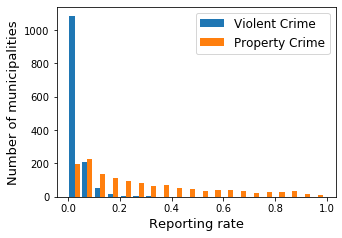

In [117]:
fig, ax = plt.subplots(figsize=(5,3.5))
plt.hist([infer_df.infer_pi, infer_df_pro.infer_pi], bins=20, label=['Violent Crime', 'Property Crime'])
ax.set_ylabel('Number of municipalities', fontsize=13)
ax.set_xlabel('Reporting rate', fontsize=13)
plt.legend(fontsize=12)
plt.savefig('exp_result/SigSpatial/ReportRate-vio-pro.pdf', bbox_inches = 'tight')

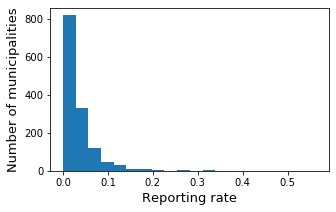

In [73]:
fig = plt.figure(figsize=(5,3))
ax = infer_df.infer_pi.plot(kind='hist', bins=20)
ax.set_ylabel('Number of municipalities', fontsize=13)
ax.set_xlabel('Reporting rate', fontsize=13)
plt.savefig('exp_result/SigSpatial/ReportRate-vio.pdf', bbox_inches = 'tight')

In [72]:
infer_df.set_index('mun_id').loc[['19026','15032','13021','16111']].T

mun_id,19026,15032,13021,16111
infer_z,4876.488791,243.995919,91.266486,13.408628
infer_y,48283.022649,18428.173631,1573.791039,1715.896426
infer_pi,0.100998,0.013240,0.057991,0.007814
true_z,5173.000000,71.000000,33.000000,26.000000
y/z,9.333660,259.551741,47.690638,65.996016
AR,68.714731,53.570468,64.363255,59.814742
NMR,34.549602,37.888604,31.670261,33.764949
M/F,0.986700,0.971300,0.898600,0.956300
M/FHH,4.538766,4.792571,4.161178,6.488291
FR,20.466078,2.978877,38.507350,3.534137


In [75]:
z_vio.describe()

count     1379.000000
mean       522.425671
std       1868.539854
min          0.000000
25%         12.500000
50%         45.000000
75%        209.000000
max      28329.000000
Name: vio_cnt, dtype: float64

In [77]:
(z_vio<900).mean()

0.902102973168963

In [79]:
(infer_df.infer_pi<0.1).mean()

0.9390862944162437

# autocorrelation

In [628]:
# b1_prior=0
tbl="""	$α_0$	$α_1$	$α_2$	$α_3$	$α_4$	$α_5$	$α_6$	$α_7$	$α_8$	$𝛽_0$	$𝛽_1$	$𝛽_2$
0	1	1	1	1	1	1	1	1	1	1.00E+00	1	1
1	0.69976416	0.67570064	0.57384768	0.048062562	0.05931886	0.133625635	0.33923421	0.130466661	0.089533563	5.22E-01	0.450711672	0.304820431
5	0.19032145	0.18970225	0.152054534	-0.002124809	-0.000256885	0.008631537	0.09388652	0.007556899	0.034522776	1.02E-01	0.092462716	0.066443703
10	0.02425174	0.01964693	0.007226481	-0.00432657	-0.002889469	-0.028261882	0.01844005	-0.028491295	-0.001956591	-1.26E-05	0.002196462	-0.002806611
50	0.01521389	0.01794613	0.017228283	0.015082395	0.015422563	0.011982063	0.01153822	0.011980343	0.011079683	2.31E-03	0.0096803	-0.01554637
"""
tbl = [l.split('\t') for l in tbl.split('\n')]

tbl =pd.DataFrame(tbl).drop(6).set_index(0)
new_header = tbl.iloc[0] #grab the first row for the header
tbl = tbl[1:] #take the data less the header row
tbl.columns = new_header #set the header row as the df header
tbl = tbl.astype(float) 

In [16]:
# b1_prior=-2
tbl="""	$α_0$	$α_1$	$α_2$	$α_3$	$α_4$	$α_5$	$α_6$	$α_7$	$α_8$	$𝛽_0$	$𝛽_1$	$𝛽_2$
0	1	1	1	1	1	1	1	1	1	1	1	1
1	0.768133087	0.74779866	0.669777975	0.028800144	0.036086284	0.280568899	0.40064448	0.276394948	0.04150343	0.574594255	0.484434909	0.3054499
5	0.257181735	0.224739957	0.179190041	-0.019623272	-0.016379987	0.018244203	0.11513631	0.017121935	0.032432836	0.137957139	0.117257755	0.074469295
10	0.02665588	0.030501271	0.024177327	0.004320488	0.004936078	-0.022060439	0.02068462	-0.022162678	0.008518482	0.035609044	0.03508396	0.008289693
50	0.007801097	0.00576992	0.003721906	-0.006636334	-0.007841829	0.011488475	-0.007868355	0.011544612	-0.003152122	0.015109989	0.007531749	0.004810188
"""
tbl = [l.split('\t') for l in tbl.split('\n')]

tbl =pd.DataFrame(tbl).drop(6).set_index(0)
new_header = tbl.iloc[0] #grab the first row for the header
tbl = tbl[1:] #take the data less the header row
tbl.columns = new_header #set the header row as the df header
tbl = tbl.astype(float) 

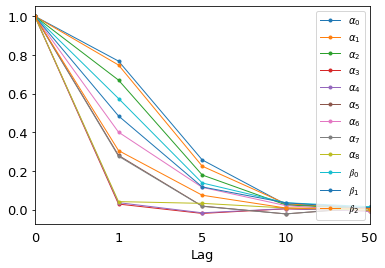

In [18]:
fig, ax = plt.subplots()
tbl.plot(linewidth=1,marker='.', ax=ax, figsize=(6,4), fontsize=13)
plt.tick_params(axis = "x", which = "major", bottom = False, top = False)
ax.set_xlabel('Lag', fontsize=13)
plt.savefig('exp_result/SigSpatial/autocorrelation.pdf')

# coefficients

In [3]:
# b1_prior=0
tbl = """
        Mean       SD  Naive SE Time-series SE
a[1]  0.7857 0.024506 2.740e-04      7.199e-04
a[2]  0.9336 0.013594 1.520e-04      3.906e-04
a[3]  0.4574 0.013013 1.455e-04      3.430e-04
a[4]  0.4978 0.024708 2.762e-04      2.894e-04
a[5] -1.4974 0.024832 2.776e-04      3.059e-04
a[6] -3.9045 0.499008 5.579e-03      7.924e-03
a[7] -0.7195 0.009078 1.015e-04      1.992e-04
a[8]  5.6794 0.499126 5.580e-03      7.874e-03
a[9] -2.1264 0.007061 7.895e-05      9.456e-05
b[1]  2.7304 0.037768 4.223e-04      9.050e-04
b[2] -1.5937 0.009439 1.055e-04      2.049e-04
b[3]  0.1846 0.010617 1.187e-04      2.125e-04
"""

In [9]:
# b1_prior=-2
tbl = """
       Mean       SD  Naive SE Time-series SE
a[1]  0.7873 0.025046 2.800e-04      7.482e-04
a[2]  0.9332 0.013837 1.547e-04      3.877e-04
a[3]  0.4578 0.013191 1.475e-04      3.533e-04
a[4]  0.4985 0.024566 2.747e-04      2.836e-04
a[5] -1.4981 0.024709 2.763e-04      2.882e-04
a[6] -3.8985 0.510106 5.703e-03      8.491e-03
a[7] -0.7194 0.009218 1.031e-04      2.080e-04
a[8]  5.6736 0.510092 5.703e-03      8.401e-03
a[9] -2.1266 0.006968 7.791e-05      8.673e-05
b[1]  2.7190 0.037161 4.155e-04      9.739e-04
b[2] -1.5913 0.009379 1.049e-04      2.213e-04
b[3]  0.1869 0.010366 1.159e-04      2.056e-04
"""

In [15]:
tmpdf = pd.DataFrame([line.split() for line in tbl.strip().split('\n')]).drop(0)[[1,2]]
tmpdf.index = ['a0', 'log(NHS)', 'log(AHS)', 'log(COMP)', 'log(MCOMP)', 'log(COHE)', 
               'log(PROX)', 'log(NMI)', 'log(NMMI)', 'b0', 'log(PR)', 'log(UR)']
print(tmpdf.applymap(lambda x: x[:-2]).to_latex())

\begin{tabular}{lll}
\toprule
{} &      1 &       2 \\
\midrule
a0         &   0.78 &  0.0250 \\
log(NHS)   &   0.93 &  0.0138 \\
log(AHS)   &   0.45 &  0.0131 \\
log(COMP)  &   0.49 &  0.0245 \\
log(MCOMP) &  -1.49 &  0.0247 \\
log(COHE)  &  -3.89 &  0.5101 \\
log(PROX)  &  -0.71 &  0.0092 \\
log(NMI)   &   5.67 &  0.5100 \\
log(NMMI)  &  -2.12 &  0.0069 \\
b0         &   2.71 &  0.0371 \\
log(PR)    &  -1.59 &  0.0093 \\
log(UR)    &   0.18 &  0.0103 \\
\bottomrule
\end{tabular}



In [4]:
tmpdf = pd.DataFrame([line.split() for line in tbl.strip().split('\n')]).drop(0)[[1]]
tmpdf.index = ['a0', 'log(NHS)', 'log(AHS)', 'log(COMP)', 'log(MCOMP)', 'log(COHE)', 
               'log(PROX)', 'log(NMI)', 'log(NMMI)', 'b0', 'log(PR)', 'log(UR)']
tmpdf.columns = ['Mean']
tmpdf = tmpdf.T
print(tmpdf.applymap(lambda x: x[:-2]).to_latex())

\begin{tabular}{lllllllllllll}
\toprule
{} &    a0 & log(NHS) & log(AHS) & log(COMP) & log(MCOMP) & log(COHE) & log(PROX) & log(NMI) & log(NMMI) &    b0 & log(PR) & log(UR) \\
\midrule
Mean &  0.78 &     0.93 &     0.45 &      0.49 &      -1.49 &     -3.90 &     -0.71 &     5.67 &     -2.12 &  2.73 &   -1.59 &    0.18 \\
\bottomrule
\end{tabular}



# reporting rate

In [ ]:
infer_z = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_fulldata_noScale/5fold-NA/pred_train_z.csv')
infer_y = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_fulldata_noScale/5fold-NA/pred_train_y.csv')
infer_pi = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_fulldata_noScale/5fold-NA/pred_train_pi.csv')

In [80]:

infer_z = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_Pro_log_8a2b_fulldata/fulldata/pred_train_z.csv')
infer_y = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_Pro_log_8a2b_fulldata/fulldata/pred_train_y.csv')
infer_pi = pd.read_csv('exp_result/SigSpatial/SigSpatialModel_Pro_log_8a2b_fulldata/fulldata/pred_train_pi.csv')
infer_df_pro = pd.DataFrame({'infer_z': infer_z['mean'], 'infer_y': infer_y['mean'], 'infer_pi': infer_pi['mean'], 'true_z': z})
infer_df_pro['y/z']=infer_df_pro.infer_y/infer_df_pro.true_z.replace(0,np.nan)
infer_df_pro['poverty_rate'] = data['poverty_rate']
infer_df_pro['active_unoccupied'] = data['active_unoccupied']
infer_df_pro['mun_id'] = data.Identifier

In [5]:
infer_df['y_group'] = pd.qcut(infer_df['infer_y'], 3, labels=['low','mid','high'])
infer_df['z_group'] = pd.qcut(infer_df['true_z'], 3, labels=['low','mid','high'])
infer_df['pi_group'] = pd.qcut(infer_df['infer_pi'], 3, labels=['low','mid','high'])



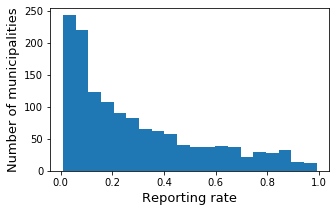

In [7]:
fig = plt.figure(figsize=(5,3))
ax = infer_df.infer_pi.plot(kind='hist', bins=20)
ax.set_ylabel('Number of municipalities', fontsize=13)
ax.set_xlabel('Reporting rate', fontsize=13)
plt.savefig('exp_result/SigSpatial/ReportRate.pdf', bbox_inches = 'tight')

In [8]:
(infer_df.infer_pi<0.2).mean()

0.4938361131254532

In [80]:
infer_df[infer_df.infer_pi>.9]

,infer_z,infer_y,infer_pi,true_z,y/z,poverty_rate,active_unoccupied,y_group,z_group,pi_group
13,1040.774819,1151.107593,0.904151,1304.0,0.882751,1.64265,5.214672,high,high,high
33,363.491277,376.643675,0.965080,143.0,2.633872,0.85918,6.548517,high,high,high
41,359.406628,383.603984,0.936921,478.0,0.802519,1.22877,4.975464,high,high,high
50,670.639435,705.538868,0.950535,403.0,1.750717,1.07166,6.163177,high,high,high
55,734.659810,798.732820,0.919782,1100.0,0.726121,1.40446,3.881410,high,high,high
58,136.448855,147.829961,0.923012,41.0,3.605609,1.34805,3.469258,mid,mid,high
63,507.888666,528.073570,0.961776,626.0,0.843568,0.84744,3.498027,high,high,high
185,17.890503,18.821755,0.950523,11.0,1.711069,1.02533,4.202158,low,mid,high
249,1040.269101,1081.698737,0.961699,1498.0,0.722095,0.89225,5.396421,high,high,high
250,3211.943905,3433.880514,0.935369,2925.0,1.173976,1.25580,5.215773,high,high,high


In [11]:
infer_df[infer_df.infer_pi<.1]

,infer_z,infer_y,infer_pi,true_z,y/z,poverty_rate,active_unoccupied
26,46.996997,747.126431,0.062904,0.0,NaN,31.23596,1.335848
29,80.050990,960.894827,0.083309,2.0,480.447414,28.35168,2.987147
30,1.358075,40.983324,0.033137,2.0,20.491662,46.10635,1.009855
31,6.589537,103.210950,0.063845,8.0,12.901369,31.18102,1.433768
64,6.041197,113.926498,0.053027,7.0,16.275214,37.86427,2.635148
...,...,...,...,...,...,...,...
1341,10.735926,163.415050,0.065697,58.0,2.817501,31.55772,1.876877
1343,15.620707,231.057902,0.067605,161.0,1.435142,32.14791,2.600565
1344,75.883357,852.539815,0.089009,64.0,13.320935,25.82830,1.977486
1347,0.757841,28.727006,0.026381,46.0,0.624500,56.11565,1.541928


In [719]:
infer_df.true_z.describe()
(infer_df.true_z<450).mean()

0.90572878897752

# mobility

In [121]:
import src.mex.regions2010 as region
import src.mex.tower as mex_tower
import src.mex_helper as mex_helper
import src.tower_interpolation as tw_int
import pre_compute_features as utils
import src.ftrs.hotspot as ftr_hs
import src.ftrs.feature_generator as ftr_gen
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [122]:
# color maps
lv5 = [220 / 256] * 3 + [1] # grey
lv4 = [165 / 256] * 3 + [1]
lv3 = [110 / 256] * 3 + [1]
lv2 = [60 / 256] * 3 + [1]
lv1 = [0 / 256] * 3 + [1] # black
n = 100

In [25]:
# prepare data
mgm = region.municipalities(load_pop=True, urb_only=True)
mex_crs = mgm.crs

print('loading crimes data')
mun_ids_with_data = sorted(set(data.Identifier) & set(mgm.index))
mgm = mgm.loc[mun_ids_with_data]
print(f'total number of mgm: {len(mgm)}')

print('loading towers and polygons')
towers_vor = mex_tower.voronoi(load_pop=True)
towers_vor_in_mgm = mex_tower.voronoi_x_region('mgm')
call_direction = 'out+in'
n_bins = 24  # 24 hours
wd_wk = 'wd'  # average weekdays or weekends
print(f'loading footfall for {wd_wk}, n_bins={n_bins}, call_direction={call_direction}')
aver = mex_helper.stat_tw_dow_aver_hr_uniq_user(call_direction, n_bins=n_bins, average_over_observed_day=True)
tw_footfall = pd.DataFrame(aver[wd_wk]).T

loading crimes data
total number of mgm: 1379
loading towers and polygons
loading existing mexico tower voronoi file: data/mex_tw_intpl/voronoi.geojson
loading existing mexico tower voronoi population file: data/mex_tw_intpl/voronoi_pop_by_ageb.csv
loading footfall for wd, n_bins=24, call_direction=out+in
loading cached tw average stats/stat_tw_dow_aver_hr_uniq_user-out+in.pickle


In [264]:
mgm_area = mgm.area
mgm_area.name = 'area'

infer_df = infer_df.merge(mgm_area, left_on='mun_id',right_index=True)

In [487]:
y_lvl = 'low'
pi_lvl = 'high'
infer_df[(infer_df.y_group==y_lvl) & (infer_df.pi_group==pi_lvl)].sort_values('infer_y', ascending=False).head(20)

,infer_z,infer_y,infer_pi,true_z,y/z,poverty_rate,active_unoccupied,mun_id,y_group,z_group,pi_group,area
1069,27.398519,67.076324,0.408468,2.0,33.538162,7.97758,3.101971,21211,low,low,high,2.968883e+06
1238,43.740147,65.983436,0.662896,10.0,6.598344,4.44748,5.793138,29001,low,mid,high,8.074339e+06
234,44.228881,64.702807,0.683570,12.0,5.391901,4.23750,6.349206,08053,low,mid,high,5.175694e+06
955,24.599813,63.234116,0.389028,1.0,63.234116,8.56165,3.679369,21097,low,low,high,3.453484e+06
790,29.759850,62.238645,0.478157,19.0,3.275718,6.73455,3.326864,18006,low,mid,high,5.286663e+06
761,23.444853,62.082925,0.377638,6.0,10.347154,9.42130,6.473852,17010,low,low,high,4.709777e+06
57,44.732155,60.270719,0.742187,24.0,2.511280,3.33887,3.842377,06004,low,mid,high,5.036422e+06
245,28.426899,60.176398,0.472393,4.0,15.044100,7.90309,11.683849,08064,low,low,high,2.351035e+06
1086,23.845818,59.674110,0.399601,193.0,0.309192,8.78046,5.815033,22011,low,high,high,1.383768e+07
746,20.422164,58.960116,0.346373,332.0,0.177591,9.50757,3.362874,16108,low,high,high,2.856354e+07


In [521]:
infer_df[infer_df.mun_id.isin(['19026','15032','13021','16111'])].T

,439,545,749,830
infer_z,30.9578,65.2328,6.01577,4559.85
infer_y,50.2818,1175.22,64.2433,4733.2
infer_pi,0.615686,0.0555071,0.0936404,0.963375
true_z,9,46,20,4579
y/z,5.58686,25.5482,3.21217,1.03368
poverty_rate,5.3049,41.4744,25.4889,0.8548
active_unoccupied,8.74494,7.51572,2.38703,4.79336
mun_id,13021,15032,16111,19026
y_group,low,high,low,high
z_group,mid,mid,mid,high


In [21]:
infer_df.set_index('mun_id').loc[['19026','15032','13021','16111']].T

mun_id,19026,15032,13021,16111
infer_z,4563.41,65.4458,30.9591,6.01313
infer_y,4738.33,1176.45,50.3297,64.3005
infer_pi,0.963084,0.0556299,0.615126,0.0935161
true_z,4579,46,9,20
y/z,1.0348,25.575,5.59219,3.21503
poverty_rate,0.8548,41.4744,5.3049,25.4889
active_unoccupied,4.79336,7.51572,8.74494,2.38703
y_group,high,high,low,low
z_group,high,mid,mid,mid
pi_group,high,low,high,low


In [518]:
# the order is wrong
data[data.Identifier.isin(['19026','15032','13021','16111'])].T

,439,545,749,830
Identifier,13021,15032,16111,19026
pro_cnt,9,46,20,4579
vio_cnt,33,71,26,5173
nhs,9,60,8,27
ahs,1.91668,13.3932,1.43307,5.42005
comp,0.547303,1.19952,0.323509,0.746952
mcomp,0.532616,1.18046,0.309738,0.786806
prox,0.917942,0.362396,0.954169,0.182957
cohe,0.80133,0.134648,0.877329,0.0321779
nmi,0.802006,0.134734,0.877801,0.0322355


In [510]:
mid = '19026'  # yh, pih
mid = '15032'  # yh, pil
mid = '13021'  # yl, pih
mid = '16111'  # yl, pil


In [125]:
mgm.loc[['19026','15032','13021','16111']]

,geometry,pobtot,CVE_ENT,CVE_MUN,NOM_MUN
mun_id,,,,,
19026,"MULTIPOLYGON (((2672873.215 1512152.162, 26728...",677546,19,026,Guadalupe
15032,"MULTIPOLYGON (((2700901.083 812575.345, 270100...",9606,15,032,Donato Guerra
13021,"POLYGON ((2861790.700 854739.758, 2861808.408 ...",8722,13,021,Emiliano Zapata
16111,"MULTIPOLYGON (((2508415.924 824393.669, 250842...",7295,16,111,Ziracuaretiro


In [511]:
su_type, admin_lvl = 'grid-500','mun_id'
intpl = 'Uni'

In [512]:
# get permanent hotspots
munic = mgm.loc[mid]
city_area = munic.geometry.area
su = utils.get_su(su_type, admin_lvl, mid, munic.geometry, mex_crs, urb_only=True)
tid_oi = towers_vor_in_mgm[towers_vor_in_mgm.mun_id == mid].gtid
su_footfall = utils.get_su_footfall(towers_vor.loc[tid_oi], su, tw_footfall.reindex(tid_oi, fill_value=0), intpl, pop_units=None)
hotspots_per_hour = ftr_hs.keep_hotspot(su_footfall.copy(), hotspot_type='loubar')
permanent_index, permanent_index_home, permanent_index_work = ftr_gen.permanent_index_three_time_range(hotspots_per_hour)
su['aver_footfall'] = su_footfall.mean(axis=1)
su['hot'] = su_footfall.loc[permanent_index].mean(axis=1)

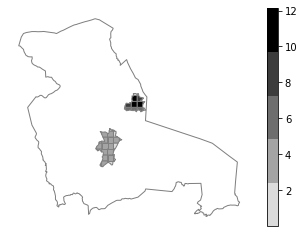

In [513]:
# aver_footfall
newcolors = []
for i in range(n):
    newcolors.append(lv5)
for i in range(n):
    newcolors.append(lv4)
for i in range(n):
    newcolors.append(lv3)
for i in range(n):
    newcolors.append(lv2)
for i in range(n):
    newcolors.append(lv1)
    
newcmp = ListedColormap(newcolors)

ax = mgm_all.loc[[mid]].plot(edgecolor='grey',color='white')

ax = su.plot(
    edgecolor='grey',
    column='aver_footfall',
    cmap=newcmp,
    legend=True,
    #     scheme='natural_breaks',
#     legend_kwds={
#         'label': "Interpolated Population",
#         'orientation': "horizontal"
#     },
        figsize=(6,5),
    ax=ax
)

ax.axis('off')
print('', end='')

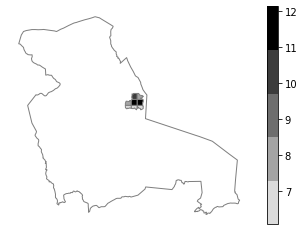

In [514]:
# per_hs
newcolors = []
for i in range(n):
    newcolors.append(lv5)
for i in range(n):
    newcolors.append(lv4)
for i in range(n):
    newcolors.append(lv3)
for i in range(n):
    newcolors.append(lv2)
for i in range(n):
    newcolors.append(lv1)

# newcolors.insert(0,[1,1,1,0],)
newcmp = ListedColormap(newcolors)

ax = mgm_all.loc[[mid]].plot(edgecolor='grey',color='white')

ax = su[~su.hot.isnull()].plot(
    edgecolor='grey',
    column='hot',
    cmap=newcmp,
    legend=True,
    #     scheme='natural_breaks',
#     legend_kwds={
#         'label': "Interpolated Population",
#         'orientation': "horizontal"
#     },
        figsize=(6,5),
    ax=ax
)


ax.axis('off')
print('', end='')

# municipality map

In [462]:
mgm_all = region.municipalities(load_pop=True, urb_only=False)

In [661]:
((mgm_all.area/1000/1000)<2000).mean(), (mgm_all.pobtot<80000).mean()

0.9096091205211726

count     2456
mean       796
std       2103
min          2
25%         85
50%        231
75%        661
max      53256
dtype: int64

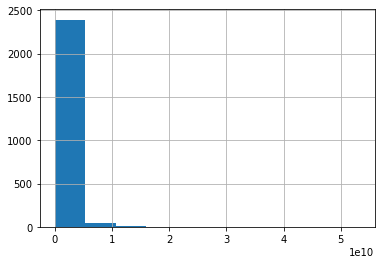

In [654]:
mgm_all.area.hist()
(mgm_all.area/1000/1000).describe().astype(int)

count       2456
mean       45739
std       132758
min           93
25%         4264
50%        12730
75%        32664
max      1815786
Name: pobtot, dtype: int64

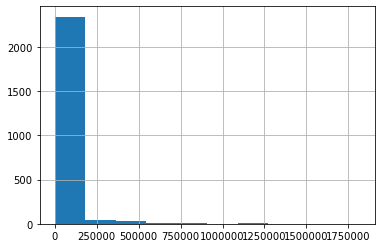

In [643]:
mgm_all.pobtot.hist()
mgm_all.pobtot.describe().astype(int)


In [665]:
mx = region.country()

In [ ]:
ax = su.plot(
    edgecolor='grey',
    #     scheme='natural_breaks',
#     legend_kwds={
#         'label': "Interpolated Population",
#         'orientation': "horizontal"
#     },
        figsize=(6,5),
    ax=ax
)

print('', end='')

(749062.9948949998, 4241756.139604997, 217625.77110999965, 2451138.1618899987)

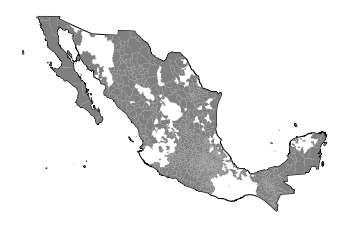

In [670]:
ax = mx.plot(color='white',edgecolor='black')
mgm_all.loc[mun_ids_with_data].plot(ax=ax,color='grey')
ax.axis('off')

In [686]:
(towers_vor_in_mgm.groupby('mun_id').size()>3).mean()

0.46864820846905536

In [683]:
towers_vor_in_mgm.groupby('mun_id').size().describe()

count    2456.000000
mean        5.954805
std        10.894270
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       165.000000
dtype: float64

In [706]:
su_footfall_mgm = {}
n_permanent = {}
for i, mid in enumerate(mun_ids_with_data):
    munic = mgm.loc[mid]
    city_area = munic.geometry.area
    su = utils.get_su(su_type, admin_lvl, mid, munic.geometry, mex_crs, urb_only=True)
    tid_oi = towers_vor_in_mgm[towers_vor_in_mgm.mun_id == mid].gtid
    su_footfall = utils.get_su_footfall(towers_vor.loc[tid_oi], su, tw_footfall.reindex(tid_oi, fill_value=0), intpl, pop_units=None)
    su_footfall_mgm[mid] = su_footfall.sum()
    hotspots_per_hour = ftr_hs.keep_hotspot(su_footfall.copy(), hotspot_type='loubar')
    permanent_index, permanent_index_home, permanent_index_work = ftr_gen.permanent_index_three_time_range(hotspots_per_hour)
    n_permanent[mid] = len(permanent_index)
    if i % 100==99:
        print('worked till', i)

worked till 99
worked till 199
worked till 299
worked till 399
worked till 499
worked till 599
worked till 699
worked till 799
worked till 899
worked till 999
worked till 1099
worked till 1199
worked till 1299


In [704]:
((pd.DataFrame(su_footfall_mgm).max()/mgm_all.loc[mun_ids_with_data[:100]].pobtot)*100).describe()

count    100.000000
mean       1.244741
std        1.166458
min        0.000000
25%        0.394278
50%        0.957510
75%        1.770952
max        7.878422
dtype: float64

In [708]:
pd.Series(n_permanent).describe()

count    1379.000000
mean       15.531545
std        17.387360
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       170.000000
dtype: float64